In [6]:
## LIBS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


## READ DATA
main = pd.read_csv('C:/Users/DELL/Downloads/Compressed/archive_3/Student Depression Dataset.csv')
main.head(3)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0


In [7]:
#removing IDs
main = main.drop(['id'],axis=1)

#changing categorical to numerical gender
main.loc[main['Gender']=='Male','Gender']=0
main.loc[main['Gender']=='Female','Gender']=1
main.head(3)

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,1,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,0,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0


In [8]:
#checking the city names and counts
main['City'].value_counts()

City
Kalyan                1570
Srinagar              1372
Hyderabad             1340
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1066
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               685
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Kibara                   1
Nandini                  1
Nalini                 

In [9]:
#removing cities with less than 400 students 
main = main[main['City'].map(main['City'].value_counts()) >= 400]
main['City'].value_counts()

City
Kalyan           1570
Srinagar         1372
Hyderabad        1340
Vasai-Virar      1290
Lucknow          1155
Thane            1139
Ludhiana         1111
Agra             1094
Surat            1078
Kolkata          1066
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              968
Ahmedabad         951
Bhopal            934
Chennai           885
Meerut            825
Rajkot            816
Delhi             768
Bangalore         767
Ghaziabad         745
Mumbai            699
Vadodara          694
Varanasi          685
Nagpur            651
Indore            643
Kanpur            609
Nashik            547
Faridabad         461
Name: count, dtype: int64

In [10]:
main.head(3)

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,1,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,0,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0


In [11]:
# Checking proffession names and counts
main['Profession'].value_counts()

Profession
Student                   27844
Architect                     8
Teacher                       6
Digital Marketer              3
Content Writer                2
Chef                          2
Doctor                        2
Pharmacist                    2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [12]:
# Removing all Professional except student
main= main.loc[main['Profession']=='Student']
main['Profession'].value_counts()

Profession
Student    27844
Name: count, dtype: int64

In [13]:
main.head(3)

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,1,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,0,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0


In [14]:
# now we have only 1 profession so we can drop this column 
main=main.drop(['Profession'],axis=1)
main.head(3)

,Gender,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,1,24.0,Bangalore,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,0,31.0,Srinagar,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0


In [15]:
main['Work Pressure'].value_counts()

Work Pressure
0.0    27841
5.0        2
2.0        1
Name: count, dtype: int64

In [16]:
#droppping Work Pressure due to students have 0 work pressures
main = main.drop(['Work Pressure'],axis=1)
main.head(3)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,5.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,1,24.0,Bangalore,2.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,0,31.0,Srinagar,3.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0


In [17]:
main['Age'].value_counts()

Age
24.0    2255
20.0    2235
28.0    2128
29.0    1940
33.0    1892
25.0    1780
21.0    1718
23.0    1640
18.0    1586
19.0    1560
34.0    1466
27.0    1459
31.0    1422
32.0    1258
22.0    1159
26.0    1153
30.0    1144
35.0      10
38.0       8
36.0       7
42.0       4
48.0       3
39.0       3
43.0       2
46.0       2
37.0       2
49.0       1
51.0       1
44.0       1
59.0       1
54.0       1
58.0       1
56.0       1
41.0       1
Name: count, dtype: int64

In [18]:
#deleting value of age greater than 30
main=main.loc[main['Age'] <= 30]
main.head(3)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1,1,24.0,Bangalore,2.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
3,1,28.0,Varanasi,3.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,1,25.0,Jaipur,4.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [19]:
#checking the academic pressure and counts
main['Academic Pressure'].value_counts()

Academic Pressure
3.0    5785
5.0    5167
4.0    4112
1.0    3546
2.0    3140
0.0       7
Name: count, dtype: int64

In [20]:
#removing students with low academic pressure due to low counts
main = main.loc[main['Academic Pressure'] >0]

In [21]:
#study satisfaction 
main['Study Satisfaction'].value_counts()

Study Satisfaction
4.0    4825
2.0    4686
3.0    4448
1.0    4336
5.0    3453
0.0       2
Name: count, dtype: int64

In [22]:
#removing students with low study satisfaction due to low numbers 
main=main.loc[main['Study Satisfaction'] > 0]

In [23]:
# Removnig Job Satisfaction due to profession drop
main=main.drop(['Job Satisfaction'],axis = 1)

In [24]:
main.head(3)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1,1,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
3,1,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,1,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [25]:
#removing sleep duration which is others
main=main.loc[main['Sleep Duration']!='Others']
main['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    6515
7-8 hours            5732
5-6 hours            4787
More than 8 hours    4702
Name: count, dtype: int64

In [26]:
#changing type categorical to numerical 
sd_map={'Less than 5 hours':0,'7-8 hours':1,'5-6 hours':2,'More than 8 hours':3}
main['Sleep Duration']=main['Sleep Duration'].replace(sd_map)

In [27]:
main['Sleep Duration'].value_counts()

Sleep Duration
0    6515
1    5732
2    4787
3    4702
Name: count, dtype: int64

In [28]:
#checking dietery habbits and removing others
main=main.loc[main['Dietary Habits']!='Others']
main['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    8353
Moderate     7591
Healthy      5783
Name: count, dtype: int64

In [29]:
# mapping dietry habbit to numerical 
dh_map={'Unhealthy':0,'Moderate':1,'Healthy':2}
main['Dietary Habits']=main['Dietary Habits'].replace(dh_map)

In [30]:
main['Dietary Habits'].value_counts()

Dietary Habits
0    8353
1    7591
2    5783
Name: count, dtype: int64

In [31]:
#checkig degree names 
main['Degree'].unique()

array(['BSc', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed', 'M.Ed', 'MSc',
       'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Pharm', 'B.Com', 'MD', 'BE',
       'BA', 'MBBS', 'B.Arch', 'LLM', 'B.Tech', 'BBA', 'M.Com', 'ME',
       'MBA', 'LLB', 'Others', 'MHM'], dtype=object)

In [32]:
#creating New Degree column which contains graduated, postgrad,pregrad
#define conditions and corresponding choices 
main=main.loc[main['Degree']!='Others']
conditions=[
    main['Degree'].str.contains(r'BSc|BCA|B.Ed|BHM|B.Pharm|B.Com|BE|BA|B.Arch|B.Tech|BBA|LLB',regex=True),
    main['Degree'].str.contains(r'MSc|MCA|M.Ed|M.Pharm|M.Com|ME|MA|M.Arch|M.Tech|MBA|LLM',regex=True),
    main['Degree']=='Class 12'
]
choices=['grad','postgrad','pregrad']
main=main.loc[main['Degree']!='Others']
main['Degree'].value_counts()
#creating new column in main as New Degree
main["New Degree"]=np.select(conditions,choices,default=np.nan)
#filter out unwanted rows
#main=main.loc[main['Degree']!='Others']
main['New Degree'].value_counts()

New Degree
grad        10201
pregrad      5839
postgrad     4451
nan          1208
Name: count, dtype: int64

In [33]:
# Refined regex to avoid matching MBA with Graduated
graduated_pattern = r'\b(BSc|BCA|B\.Ed|BHM|B\.Pharm|B\.Com|BE|BA|B\.Arch|B\.Tech|BBA|LLB)\b'
post_graduated_pattern = r'\b(MSc|MCA|M\.Ed|M\.Pharm|M\.Com|ME|MA|M\.Arch|M\.Tech|MBA|LLM)\b'

# Create conditions for each category
conditions = [
    main['Degree'].str.contains(graduated_pattern, regex=True),  # Graduated degrees
    main['Degree'].str.contains(post_graduated_pattern, regex=True),  # Post Graduated degrees
    main['Degree'] == 'Class 12'  # Higher Secondary degrees
]

# Define the choices for the new column
choices = ['Grad', 'PostGrad', 'pregrad']

# Apply the new classification logic
main['New Degree'] = np.select(conditions, choices, default=np.nan)

# Filter out rows where degree is 'Others'
main = main.loc[main['Degree'] != 'Others']

# Check the result
main['New Degree'].value_counts()


C:\Users\DELL\AppData\Local\Temp\ipykernel_1620\2381038339.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  main['Degree'].str.contains(graduated_pattern, regex=True),  # Graduated degrees
C:\Users\DELL\AppData\Local\Temp\ipykernel_1620\2381038339.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  main['Degree'].str.contains(post_graduated_pattern, regex=True),  # Post Graduated degrees


New Degree
Grad        9782
pregrad     5839
PostGrad    4870
nan         1208
Name: count, dtype: int64

In [34]:
#dropping nan value
main = main.loc[main['New Degree'] != 'nan']
main['New Degree'].value_counts()

New Degree
Grad        9782
pregrad     5839
PostGrad    4870
Name: count, dtype: int64

In [35]:
#changing new degree to numericals
nd_map={'Grad':0,'pregrad':1,'PostGrad':2}
main['New Degree']=main['New Degree'].replace(nd_map)
main['New Degree'].value_counts()

New Degree
0    9782
1    5839
2    4870
Name: count, dtype: int64

In [36]:
## CHECKING SUICIDAL THOUGHTS
main['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
Yes    13487
No      7004
Name: count, dtype: int64

In [37]:
#changing yes and no to 1 and 0 
st_map={'Yes':1,'No':0}
main['Have you ever had suicidal thoughts ?']=main['Have you ever had suicidal thoughts ?'].replace(st_map)

In [38]:
main['Have you ever had suicidal thoughts ?'].value_counts()


Have you ever had suicidal thoughts ?
1    13487
0     7004
Name: count, dtype: int64

In [39]:
## CHECKING THE FAMILY HISTORY OF MENTAL ILLNESS
main['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
No     10596
Yes     9895
Name: count, dtype: int64

In [40]:
#changing values of yes and no to 1 and 0 resp.
fh_map={'No':0,'Yes':1}
main['Family History of Mental Illness']=main['Family History of Mental Illness'].replace(fh_map)
main['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
0    10596
1     9895
Name: count, dtype: int64

In [41]:
#checking for null values and removing them 
main.isnull().sum()
main=main.dropna()
main = main.dropna(subset=['New Degree'])

In [42]:
## CREATING A NEW DF TO CHECK IF THERE IS ANY CORRELATION BETWEEN THE NUMERIC VARIABLES
main_data = main[['Gender', 'Age', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'New Degree']]
main_data.head(3)

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,New Degree
1,1,24.0,2.0,5.90,5.0,2,1,0,3.0,2.0,1,0,0
3,1,28.0,3.0,5.59,2.0,1,1,1,4.0,5.0,1,1,0
4,1,25.0,4.0,8.13,3.0,2,1,1,1.0,1.0,0,0,2


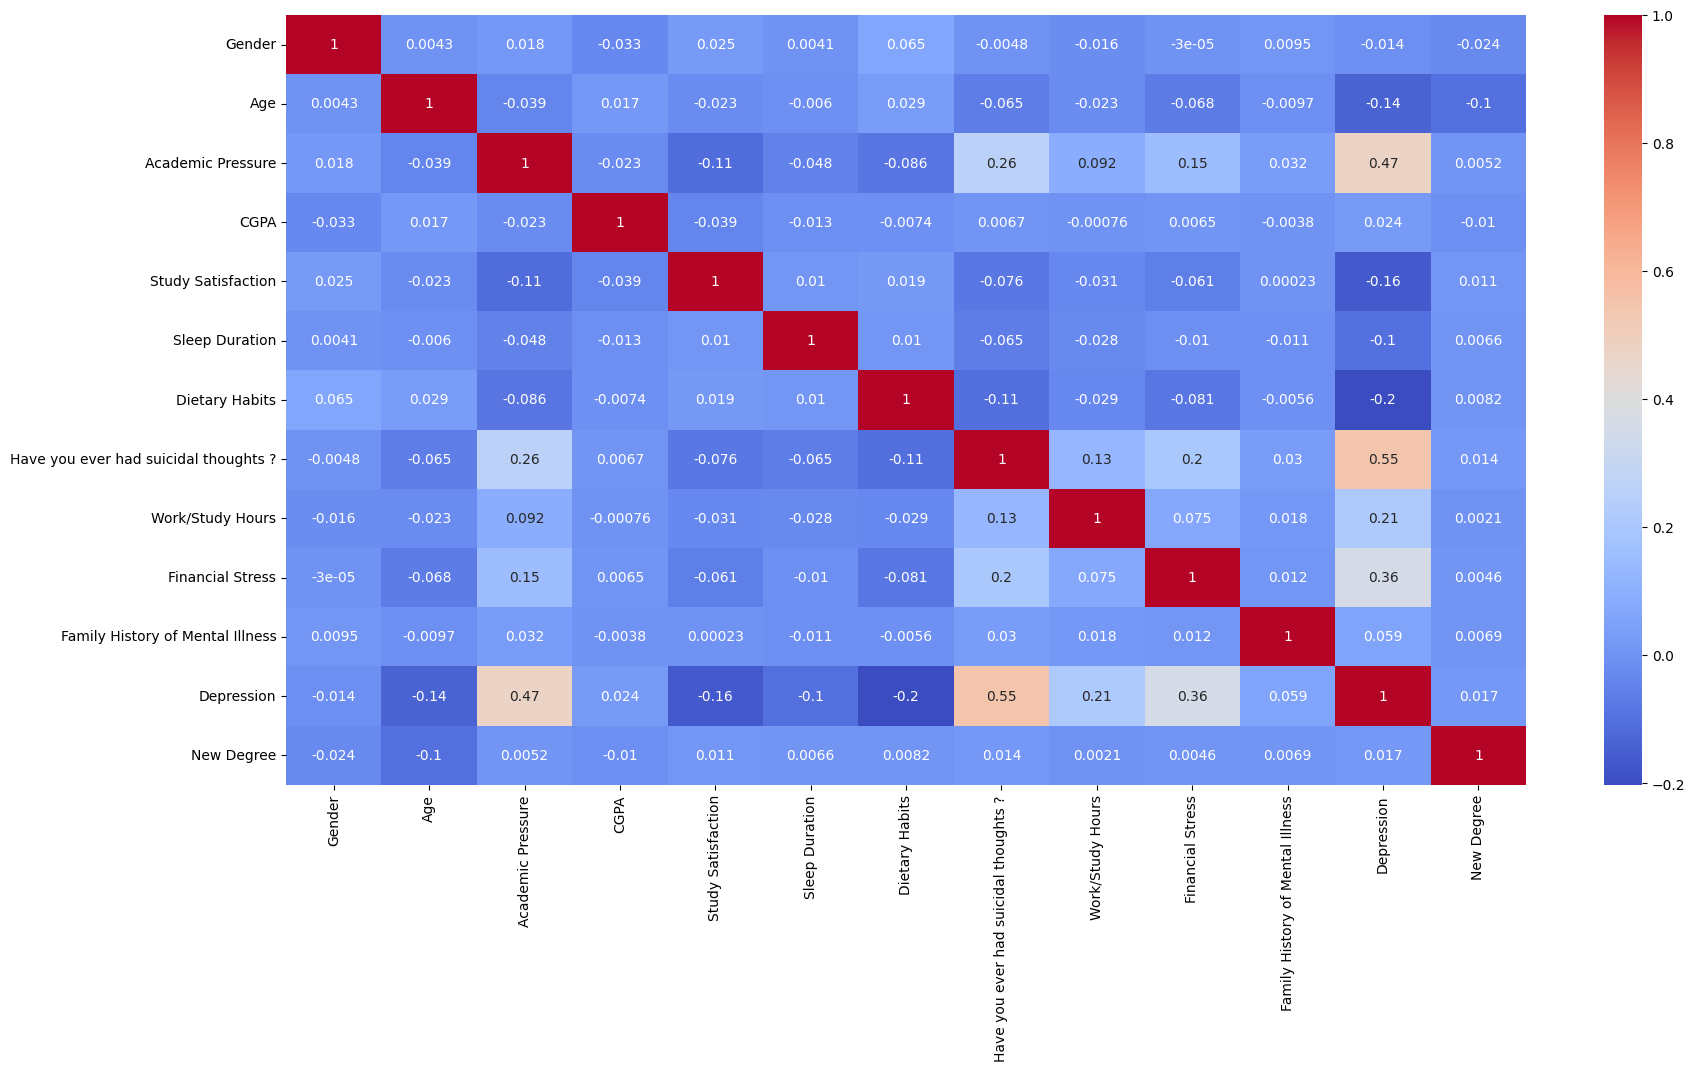

In [43]:
## PLOTTING THE CORRELATION MATRIX
plt.figure(figsize=(20, 10))
sns.heatmap(main_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [44]:
#creating dumy variables for City column
encoder=OneHotEncoder(sparse_output=False)
encoded=encoder.fit_transform(main[['City']])
encoded_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out(['City']))
#adjusting the index
encoded_df.index=main.index
main_encoded=pd.concat([main,encoded_df],axis=1)
#checking the ne df
main_encoded.columns

Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'New Degree', 'City_Agra', 'City_Ahmedabad', 'City_Bangalore',
       'City_Bhopal', 'City_Chennai', 'City_Delhi', 'City_Faridabad',
       'City_Ghaziabad', 'City_Hyderabad', 'City_Indore', 'City_Jaipur',
       'City_Kalyan', 'City_Kanpur', 'City_Kolkata', 'City_Lucknow',
       'City_Ludhiana', 'City_Meerut', 'City_Mumbai', 'City_Nagpur',
       'City_Nashik', 'City_Patna', 'City_Pune', 'City_Rajkot',
       'City_Srinagar', 'City_Surat', 'City_Thane', 'City_Vadodara',
       'City_Varanasi', 'City_Vasai-Virar', 'City_Visakhapatnam'],
      dtype='object')

In [45]:
## REMOVING THE ORIGINAL CITY AND OLD DEGREE COLUMN
main_encoded = main_encoded.drop(['City', 'Degree'], axis=1)
main_encoded.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,...,City_Patna,City_Pune,City_Rajkot,City_Srinagar,City_Surat,City_Thane,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam
1,1,24.0,2.0,5.90,5.0,2,1,0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,28.0,3.0,5.59,2.0,1,1,1,4.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,25.0,4.0,8.13,3.0,2,1,1,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,30.0,3.0,9.54,4.0,1,2,0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,1,30.0,2.0,8.04,4.0,0,0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# Splitting the data into features X and Targets Y
X=main_encoded.drop(['Depression'],axis=1).values   #Features
y=main_encoded['Depression'].values  #target

In [47]:
#splitting the data into train and test 
train_X,test_X,train_y,Test_y=train_test_split(X,y,test_size=0.2,random_state=1)
#normalizing the data feature using standarscaler 
scalar=StandardScaler()
x_train_scaled=scalar.fit_transform(train_X)
x_test_scaled=scalar.transform(test_X)


In [48]:
#training the model using logisticregression 
model = LogisticRegression()
model.fit(x_train_scaled,train_y)
#scoring and printing accuracy 
score= model.score(x_test_scaled,Test_y)
print(f"Accuracy: {score*100:.2f}%")

Accuracy: 85.09%


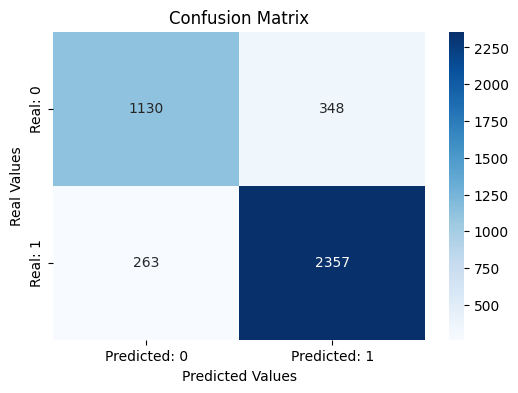

In [49]:
## PLLOTING THE CONFUSION MATRIX
y_pred = model.predict(x_test_scaled)
cm = confusion_matrix(Test_y, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: 0', 'Predicted: 1'], yticklabels=['Real: 0', 'Real: 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.show()

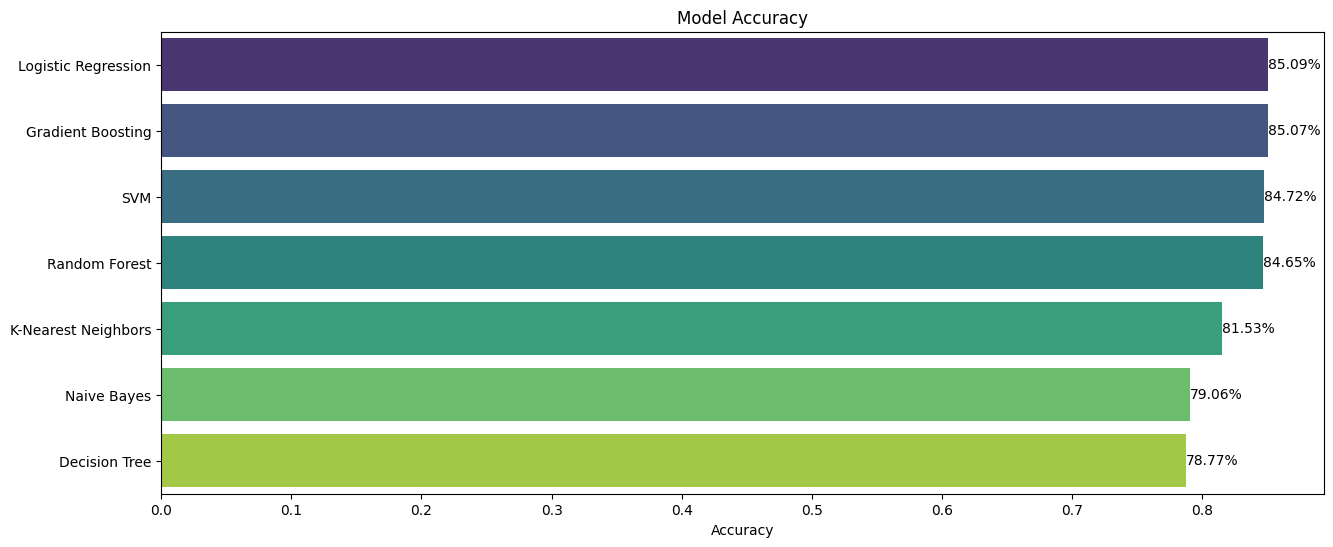

In [50]:
## COMPARING MULTIPLE MODELS TO CHECK THE BEST ONE

## MODELS
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#import xgboost as xgb
#import lightgbm as lgb
from sklearn.metrics import accuracy_score

## MODELS TO BE COMPARED
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
   # "XGBoost": xgb.XGBClassifier(random_state=42),
    #"LightGBM": lgb.LGBMClassifier(random_state=42, verbose=-1)
}

## TRAINING THE MODELS AND STORING THE ACCURACY
accuracy_results = {}

for name, model in models.items():
    model.fit(x_train_scaled, train_y)  
    y_pred = model.predict(x_test_scaled) 
    accuracy = accuracy_score(Test_y, y_pred)  
    accuracy_results[name] = accuracy 

## ORDERING THE ACCURACY RESULTS FROM HIGHEST TO LOWEST
accuracy_results_ordened = dict(sorted(accuracy_results.items(), key=lambda item: item[1], reverse=True))


## PLOTTING THE ACCURACY OF EACH MODEL ORDERING BY HIGHEST ACCURACY AND ADDING THE ACCURACY VALUE ABOVE THE BARS
plt.figure(figsize=(15, 6))
sns.barplot(x=list(accuracy_results_ordened.values()), 
            y=list(accuracy_results_ordened.keys()), 
            palette='viridis')
plt.xlabel('Accuracy')
plt.title('Model Accuracy')

## LABELS
for i, v in enumerate(accuracy_results_ordened.values()):
    plt.text(v, i, f'{v*100:.2f}%', color='black', va='center')
plt.show()
